In [20]:
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as nm

class Glcm:
    def __init__(self):
        self.result =[] 
        
    def forOder(self,a, b):
        size = 0
        for i in a[0]:
            size=size+1
        for i in range(len(a)):
                for j in range(len(a[i])-1):
                    p=a[i][j]
                    q=a[i][j+1]
                    b[p][q]=b[p][q]+1

        matriksIterasi1=list(map(list,zip(*b)))
        for i in range(len(b)):
                for j in range(len(b)):
                    b[i][j]=b[i][j]+matriksIterasi1[i][j]
        print("Grayscale Dependenc Mariks")
        count=0
        for i in b:
            for j in i:
                count=count+j
#         print(b)
        return self.normalisasi(b, count)

    def forOder45(self,a, b):
        size = 0
        for i in a[0]:
            size=size+1
        for i in range(len(a)-1):
                for j in range(size-1):
                    p=a[i][j+1]
                    q=a[i+1][j]
                    
                    b[p][q]=b[p][q]+1
        matriksIterasi1=list(map(list,zip(*b)))
        for i in range(len(b)):
                for j in range(len(b)):
                    b[i][j]=b[i][j]+matriksIterasi1[i][j]
        print("Grayscale Dependenc Mariks 45 derajat")
        count=0
        for i in b:
            for j in i:
                count=count+j
        print()
        return self.normalisasi(b, count)
    
    def forOder90(self,a, b):
        size = 0
        for i in a[0]:
            size=size+1
        for i in range(len(a)-1):
                for j in range(size):
                    p=a[i][j]
                    q=a[i+1][j]
                    b[p][q]=b[p][q]+1          
        matriksIterasi1=list(map(list,zip(*b)))
        for i in range(4):
                for j in range(4):
                    b[i][j]=b[i][j]+matriksIterasi1[i][j]
        print("Grayscale Dependenc Mariks 90 derajat")
        count=0
        for i in b:
            for j in i:
                count=count+j
        print()
        return self.normalisasi(b, count)

        # 135 derajat
    def forOder135(self,a, b):
        size = 0
        for i in a[0]:
            size=size+1
        for i in range(len(a)-1):
                for j in range(size-1):
                    p=a[i][j]
                    q=a[i+1][j+1]
                    b[p][q]=b[p][q]+1

        matriksIterasi1=list(map(list,zip(*b)))
        for i in range(len(b)):
                for j in range(len(b)):
                    b[i][j]=b[i][j]+matriksIterasi1[i][j]
        print("Grayscale Dependenc Mariks 135 derajat")
        count=0
        for i in b:
            for j in i:
                count=count+j
        print()
        return self.normalisasi(b, count)

    def normalisasi(self,data, counter):
        print("Matriks coocurence")
        for i in range(len(data)):
                for j in range(len(data)):
                     data[i][j]=data[i][j]/counter
        cs = plt.imshow(data)
        plt.show()
        return data

    def asmMethod(self, data):
        sume =0
        for i in range(len(data)-1):
            for j in range(len(data[i])-1):
                sume =sume + data[i][j]*data[i][j]
#                 sume = sume*sume
        print("ASM :")
        print(sume)
        return sume
#         self.contrasMethod(data)
    
    
    def contrasMethod(self, data):
        result = 0
        n = 0
        for i in range(len(data)-1):
            for j in range(len(data[i])-1):
                result = result+data[i][j]*((i-j)*(i-j))
#         for n in range(len(data)-1):
#             for i in range(len(data)-1):
#                 for j in range(len(data[i])-1):
#                     if abs(i-j)==n:
#                         

                
        print("Contras :")
        print(result)
        return result
    
    def idmMethod(self, data):
        result = 0
        for i in range(len(data)-1):
            for j in range(len(data[i])-1):
                kiri = 1/(1+((i-j)**2))
                tot = kiri*data[i][j]
                result = result + tot
        print("Invert Different Moment : ")
        print(result)
        return result
        
#     def ent2Method(this, data):
#         result = 0
    def ent2Method(self, data):
        result = 0;
        for i in range(len(data)-1):
            for j in range(len(data[i])-1):
#                 if(data[i][j]>0.0):
                value = data[i][j]*math.log2(data[i][j])
                result = result + value
        print("Entropy : ")
        print(result)
        return result
        
    def corMethod(this, data):
        data = nm.array(data)
        result = 0
        for i in range(len(data)-1):
            for j in range(len(data)-1):
                if data[i][j] > 0.0 :
                    meanX = this.meanColumnMatrix(data[:,j])
                    meanY = this.meanRowMatrix(data[:,j],data[i,:])
                    stdCol = this.stdColumn(data[:,j], meanX)
                    stdRow = this.stdRow(data[i,:], meanY)
                    result = result + (((i*j*data[i][j]) - (meanX*meanY))/(stdCol*stdRow))
        print("Corelation : ")
        print(result)
        return result
        
    def varMethod(this, data):
        data = nm.array(data)
        result = 0
        for i in range(len(data)-1):
            for j in range(len(data)-1):
                meanX = this.meanColumnMatrix(data[:,j])
                meanY = this.meanRowMatrix(data[:,j],data[i,:])
                result = result + ((i-meanX)*(j*meanY)*data[i,j])
        print("Variance : ")
        print(result)
        return result
                
    def meanColumnMatrix(this, kolom):
        return sum(kolom)/len(kolom)
        
    def meanRowMatrix(this, kolom, baris):
        return sum(baris)/len(kolom)
    
    def stdColumn(this, kolom, mean):
        sum = 0
        total = len(kolom)-1
        for x in range(total):
            atas = (kolom[x]-mean)**2
            sum = sum + (atas/total)
        return math.sqrt(sum)
    
    def stdRow(this, baris, mean):
        sum = 0
        total = len(baris)-1
        for x in range(total):
            atas = (baris[x]-mean)**2
            sum = sum + (atas/total)
        return math.sqrt(sum) 

In [15]:
from PIL import Image
import os 
from io import BytesIO
import csv
import numpy as nm

class Data:
    def __init__(self):
        imageObject  = Image.open("2_100.jpg")
        cropped     = imageObject.crop((20,20,80,80))
        # cropped.show()
        # cropped.shape()
        cropped.show()
        self.citra = nm.array(cropped)
        self.citra = self.citra.transpose(2,0,1).reshape(3,-1)
        size = 0
        for i in self.citra:
            if max(i)>size:
                size=max(i)
        self.matriksIterasi = [[0 for i in range(size+1)] for j in range(size+1)]

    def insertoCsv(self,message, asm, contras, invert, entropy, cor, var):
        row = [message, asm, contras, invert, entropy, cor, var]
        with open('glcm1.csv', 'a') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow(row)
        print("succes")
        csvFile.close()

In [35]:
# row =["Matriks", "asm", "cont", "idm", "e"]
# with open('glcm1.csv', 'a') as csvFile:
#     writer = csv.writer(csvFile)
#     writer.writerow(row)
#     print("succes")
# csvFile.close()

In [41]:
data = Data()

Grayscale Dependenc Mariks
Matriks coocurence


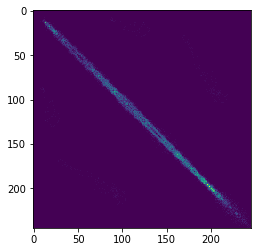

ASM :
0.0005170052922658714
Invert Different Moment : 
0.29157595085113835
Contras :
212.511160507547


ValueError: math domain error

In [21]:
# Matriks iterasi 0 derajat
glcm = Glcm()
data = Data()
nor0 = glcm.forOder(data.citra, data.matriksIterasi)
asm = glcm.asmMethod(nor0)
idm = glcm.idmMethod(nor0)
cont = glcm.contrasMethod(nor0)
ent = glcm.ent2Method(nor0)
con = glcm.corMethod(nor0)
var = glcm.varMethod(nor0)
# # print(asm)
data.insertoCsv("0 derajat", asm, cont, idm, ent, con, var)

Grayscale Dependenc Mariks 45 derajat

Matriks coocurence


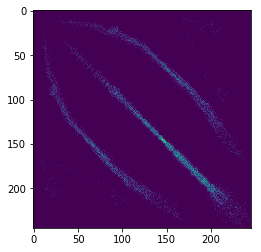

ASM :
0.00029235918691608435
Invert Different Moment : 
0.14563933713777105
Contras :
0.9998610660873692
Entropy : 
-12.108166382374913
Corelation : 
5717704585806.341
Variance : 
0.4614365579261709
succes


In [4]:
nor45 = glcm.forOder45(data.citra, data.matriksIterasi)
asm = glcm.asmMethod(nor45)
idm = glcm.idmMethod(nor45)
cont = glcm.contrasMethod(nor45)
ent = glcm.ent2Method(nor45)
con = glcm.corMethod(nor45)
var = glcm.varMethod(nor45)
data.insertoCsv("45 derajat", asm, cont, idm, ent, con, var)

Grayscale Dependenc Mariks 90 derajat

Matriks coocurence


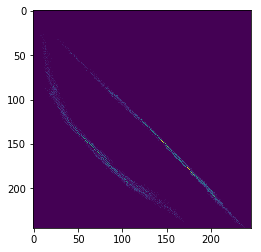

ASM :
0.000985760260998645
Invert Different Moment : 
0.06729677994847953
Contras :
0.9998611111047845
Entropy : 
-10.487141712202403
Corelation : 
1773187384626.8958
Variance : 
0.6032682110019735
succes


In [5]:
nor90 = glcm.forOder90(data.citra, data.matriksIterasi)
asm = glcm.asmMethod(nor90)
idm = glcm.idmMethod(nor90)
cont = glcm.contrasMethod(nor90)
ent = glcm.ent2Method(nor90)
con = glcm.corMethod(nor90)
var = glcm.varMethod(nor90)
data.insertoCsv("90 derajat", asm, cont, idm, ent, con, var)

Grayscale Dependenc Mariks 135 derajat

Matriks coocurence


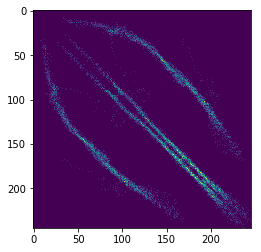

ASM :
0.0002500290990302554
Invert Different Moment : 
0.03212407325615976
Contras :
0.9998610725254677
Entropy : 
-12.262959166968962
Corelation : 
6155436721876.435
Variance : 
0.4606089730551641
succes


In [6]:
nor135 = glcm.forOder135(data.citra, data.matriksIterasi)
asm = glcm.asmMethod(nor135)
idm = glcm.idmMethod(nor135)
cont = glcm.contrasMethod(nor135)
ent = glcm.ent2Method(nor135)
con = glcm.corMethod(nor135)
var = glcm.varMethod(nor135)
data.insertoCsv("135 derajat", asm, cont, idm, ent, con, var)


In [7]:
# matriks iterasi rata-rata
for i in range(len(nor0)-1):
    for j in range(len(nor0[i])-1):
        nor0[i][j]=nor0[i][j]+nor45[i][j]+nor90[i][j]+nor135[i][j]/4
print()
print("Normalisasi :")
asm = glcm.asmMethod(nor0)
idm = glcm.idmMethod(nor0)
cont = glcm.contrasMethod(nor0)
ent = glcm.ent2Method(nor0)
con = glcm.corMethod(nor0)
var = glcm.varMethod(nor0)
data.insertoCsv("Mean", asm, cont, idm, ent, con, var)


Normalisasi :
ASM :
0.0026409323585070417
Invert Different Moment : 
0.10440323808251895
Contras :
3.2495484857078316
Entropy : 
-34.32895598152605
Corelation : 
1893988740577.151
Variance : 
4.865113001333595
succes


In [16]:
from PIL import Image
import numpy as nm
imageObject  = Image.open("0_100.jpg")
cropped     = imageObject.crop((20,20,80,80))
# cropped.show()
# cropped.shape()
citra = nm.array(cropped)
citra = citra.transpose(2,0,1).reshape(3,-1)
size = 0
for i in citra:
    if max(i)>size:
        size=max(i)
size

243